In [ ]:
import os
import cv2
import pytesseract
from langdetect import detect_langs

# Path to the directory containing images
input_dir = "/content/drive/MyDrive/ocr_unzip"

# Path to the output directory
output_dir = "/content/drive/MyDrive/ocr_unzip"

# Function to detect Devanagari script
def is_devanagari(text):
    try:
        lang = detect_langs(text)[0]
        return lang.lang == 'hi' and lang.prob > 0.8
    except:
        return False

# Iterate over files in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        file_path = os.path.join(input_dir, filename)
        # Read the image
        image = cv2.imread(file_path)
        # Convert the image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Use pytesseract to extract text from the image
        text = pytesseract.image_to_string(gray_image, lang='hin+eng')
        # Check if the extracted text is in Devanagari script
        if is_devanagari(text):
            # Rename the file to include the Devanagari label
            new_filename = "devanagari_" + filename
            new_file_path = os.path.join(output_dir, new_filename)
            os.rename(file_path, new_file_path)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
from zipfile import ZipFile

# Path to the zip file
zip_file_path = "/content/sample.zip"

# Directory to extract the files
extract_dir = "/content/extracted"

# Create a directory to extract the files
os.makedirs(extract_dir, exist_ok=True)

# Unzip the file
with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List the extracted files
extracted_files = os.listdir(extract_dir)
print("Extracted files:")
for file in extracted_files:
    print(file)


In [ ]:
!unzip "/content/drive/MyDrive/ocr_datasets"

unzip:  cannot find or open /content/drive/MyDrive/ocr_datasets, /content/drive/MyDrive/ocr_datasets.zip or /content/drive/MyDrive/ocr_datasets.ZIP.


In [ ]:
import zipfile
import os

# Path to the folder containing the zip files
folder_path = "/content/drive/MyDrive/ocr_datasets"

# Get a list of all files in the folder
files = os.listdir(folder_path)

# Iterate through each file
for file in files:
    if file.endswith('.zip'):  # Check if the file is a zip file
        # Path to the zip file
        zip_file_path = os.path.join(folder_path, file)

        # Directory to extract the files to
        extract_dir = os.path.splitext(zip_file_path)[0]

        # Create a ZipFile object
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            # Extract all files to the directory
            zip_ref.extractall(extract_dir)


In [ ]:
import zipfile
import os
from google.colab import files

# Upload the zip file
uploaded = files.upload()

# Path to the folder where zip files are uploaded
folder_path = '/content/drive/MyDrive/ocr_datasets'

# Create the folder if it doesn't exist
os.makedirs(folder_path, exist_ok=True)

# Move the uploaded files to the folder
for name, data in uploaded.items():
    file_path = os.path.join(folder_path, name)
    with open(file_path, 'wb') as f:
        f.write(data)

# Iterate through each file in the folder
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    if file_name.endswith('.zip'):  # Check if the file is a zip file
        # Create a new folder for the extracted files
        extract_folder_name = os.path.splitext(file_name)[0]
        extract_folder_path = os.path.join(folder_path, extract_folder_name)
        os.makedirs(extract_folder_path, exist_ok=True)

        # Extract the zip file
        with zipfile.ZipFile(file_path, 'r') as zip_ref:
            zip_ref.extractall(extract_folder_path)

        # Remove the zip file
        os.remove(file_path)

# Refresh the file list in the sidebar
!echo '{"path": "/content"}' > /dev/null


KeyboardInterrupt: 

In [ ]:
import zipfile
import os

# Path to the folder in Google Drive containing the zip files
folder_path = '/content/drive/MyDrive/ocr_datasets'

# Path to the folder where you want to extract the files
extracted_folder_path = '/content/drive/MyDrive/ocr_unzip'

# Create the extracted folder if it doesn't exist
os.makedirs(extracted_folder_path, exist_ok=True)

# List all files in the folder
files = os.listdir(folder_path)

# Iterate through each file
for file in files:
    if file.endswith('.zip'):  # Check if the file is a zip file
        # Path to the zip file
        zip_file_path = os.path.join(folder_path, file)

        # Directory to extract the files to
        extract_dir = os.path.join(extracted_folder_path, os.path.splitext(file)[0])

        # Create a directory for the extracted files
        os.makedirs(extract_dir, exist_ok=True)

        # Create a ZipFile object
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            # Extract all files to the directory
            zip_ref.extractall(extract_dir)

print("Extraction completed. Files are extracted to:", extracted_folder_path)


Extraction completed. Files are extracted to: /content/drive/MyDrive/ocr_unzip


In [ ]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=7a1323ac6602bb1b1804238e42ab26467d25b0854e771502cd87b2bb2577dd50
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

# Load dataset
def load_dataset(data_directory):
    images = []
    labels = []
    for folder in os.listdir(data_directory):
        folder_path = os.path.join(data_directory, folder)
        if not os.path.isdir(folder_path):
            continue  # Skip if not a directory
        label = int(folder)  # Assuming folder name is the label
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            if not os.path.isfile(file_path):
                continue  # Skip if not a file
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (32, 32))
            images.append(image)
            labels.append(label)
    return np.array(images), np.array(labels)



# Load and preprocess dataset
data_directory = '/content/drive/MyDrive/ocr_unzip'
images, labels = load_dataset(data_directory)
images = images.reshape(-1, 32, 32, 1)
images = images / 255.0
labels = to_categorical(labels)

# Split dataset into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Define CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(46, activation='softmax')  # Adjust 46 based on the number of classes
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data Augmentation
datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, zoom_range=0.2, fill_mode='nearest')
datagen.fit(train_images)

# Train model
model.fit(datagen.flow(train_images, train_labels, batch_size=32), epochs=20, validation_data=(test_images, test_labels))

# Evaluate model
loss, accuracy = model.evaluate(test_images, test_labels)
print("Test Accuracy:", accuracy)

# Save retrained model
model.save('retrained_devanagari_character_recognition_model.h5')


ValueError: invalid literal for int() with base 10: 'd'

In [ ]:
import numpy as np
import os
import cv2
import pytesseract

def load_dataset(data_directory):
    images = []
    labels = []
    for folder in os.listdir(data_directory):
        folder_path = os.path.join(data_directory, folder)
        if not os.path.isdir(folder_path):
            continue  # Skip if not a directory
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            if not os.path.isfile(file_path):
                continue  # Skip if not a file
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (32, 32))
            images.append(image)
            # Use pytesseract to extract text from the image
            text = pytesseract.image_to_string(image, lang='eng+dev')
            labels.append(text.strip())
    return np.array(images), np.array(labels)

# Load dataset
data_directory = '/content/drive/MyDrive/ocr_unzip'
images, labels = load_dataset(data_directory)

# Print the file names and corresponding Devanagari letters
for file_name, devanagari_letter in zip(os.listdir(data_directory), labels):
    print(f"File: {file_name}, Devanagari Letter: {devanagari_letter}")


File: d, Devanagari Letter: 
File: da, Devanagari Letter: 
File: dee, Devanagari Letter: 
File: doo, Devanagari Letter: 
File: d an, Devanagari Letter: 
File: dann, Devanagari Letter: 
File: dh, Devanagari Letter: 
File: dha, Devanagari Letter: 
File: dhee, Devanagari Letter: 
File: dhoo, Devanagari Letter: 
File: dhann, Devanagari Letter: 
File: dhannnn, Devanagari Letter: 
File: n, Devanagari Letter: 
File: na, Devanagari Letter: 
File: nee, Devanagari Letter: 
File: noo, Devanagari Letter: 
File: nan, Devanagari Letter: 
File: nann, Devanagari Letter: 
File: p, Devanagari Letter: 
File: pa, Devanagari Letter: 
File: pi, Devanagari Letter: 
File: po, Devanagari Letter: 
File: pii, Devanagari Letter: 
File: pau, Devanagari Letter: 
File: pauu, Devanagari Letter: 
File: pe, Devanagari Letter: 
File: pee, Devanagari Letter: 
File: poo, Devanagari Letter: 
File: pan, Devanagari Letter: 
File: paan, Devanagari Letter: 
File: f, Devanagari Letter: 
File: fan, Devanagari Letter: 
File: faan

In [ ]:
from google.cloud import vision
import os

# Path to your directory containing the files
directory = '/content/drive/MyDrive/ocr_unzip'

# Initialize the Google Cloud Vision client
client = vision.ImageAnnotatorClient()

# Function to extract text from image
def extract_text(image_path):
    with open(image_path, 'rb') as image_file:
        content = image_file.read()
    image = vision.Image(content=content)
    response = client.text_detection(image=image)
    texts = response.text_annotations
    if texts:
        return texts[0].description
    return None

# Rename files based on the extracted text
for file_name in os.listdir(directory):
    image_path = os.path.join(directory, file_name)
    if os.path.isfile(image_path):
        text = extract_text(image_path)
        if text:
            new_file_name = text.replace(' ', '_')  # Replace spaces with underscores
            new_file_path = os.path.join(directory, new_file_name)
            os.rename(image_path, new_file_path)
            print(f"File '{file_name}' renamed to '{new_file_name}'")
        else:
            print(f"No text found in '{file_name}'")


In [ ]:
!pip install google-cloud-vision


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.6/459.6 kB 5.0 MB/s eta 0:00:00


In [ ]:
import cv2
from PIL import Image
import pytesseract
import os

# Path to the folder containing images
data_directory = '/content/drive/MyDrive/ocr_unzip'

# Iterate over each file in the directory
for file_name in os.listdir(data_directory):
    # Read the image
    image_path = os.path.join(data_directory, file_name)
    image = cv2.imread(image_path)

    # Check if the image was read successfully
    if image is not None:
        # Convert the image to RGB (OpenCV uses BGR by default)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Convert the NumPy array to a PIL Image object
        pil_image = Image.fromarray(image_rgb)

        # Perform OCR using Tesseract
        try:
            text = pytesseract.image_to_string(pil_image, lang='dev')  # Use the appropriate language code for Devanagari
        except pytesseract.TesseractError as e:
            print(f"OCR failed for image '{image_path}': {e}")
            continue

        # Rename the file with the extracted text
        new_file_name = os.path.join(data_directory, f'{text.strip()}.jpg')
        os.rename(image_path, new_file_name)
    else:
        print(f"Failed to read image '{image_path}'")


Failed to read image '/content/drive/MyDrive/ocr_unzip/d'
Failed to read image '/content/drive/MyDrive/ocr_unzip/da'
Failed to read image '/content/drive/MyDrive/ocr_unzip/dee'
Failed to read image '/content/drive/MyDrive/ocr_unzip/doo'
Failed to read image '/content/drive/MyDrive/ocr_unzip/d an'
Failed to read image '/content/drive/MyDrive/ocr_unzip/dann'
Failed to read image '/content/drive/MyDrive/ocr_unzip/dh'
Failed to read image '/content/drive/MyDrive/ocr_unzip/dha'
Failed to read image '/content/drive/MyDrive/ocr_unzip/dhee'
Failed to read image '/content/drive/MyDrive/ocr_unzip/dhoo'
Failed to read image '/content/drive/MyDrive/ocr_unzip/dhann'
Failed to read image '/content/drive/MyDrive/ocr_unzip/dhannnn'
Failed to read image '/content/drive/MyDrive/ocr_unzip/n'
Failed to read image '/content/drive/MyDrive/ocr_unzip/na'
Failed to read image '/content/drive/MyDrive/ocr_unzip/nee'
Failed to read image '/content/drive/MyDrive/ocr_unzip/noo'
Failed to read image '/content/drive/

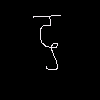

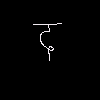

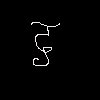

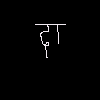

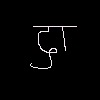

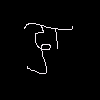

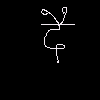

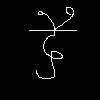

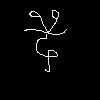

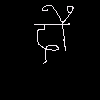

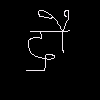

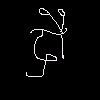

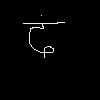

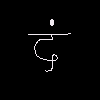

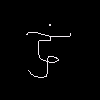

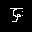

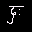

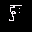

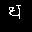

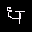

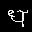

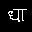

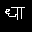

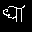

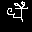

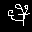

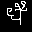

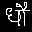

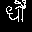

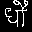

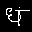

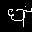

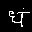

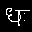

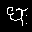

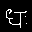

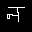

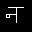

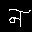

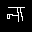

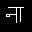

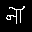

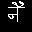

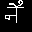

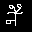

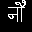

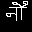

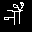

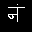

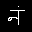

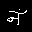

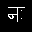

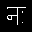

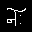

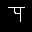

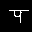

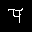

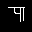

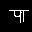

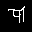

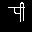

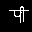

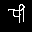

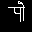

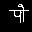

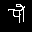

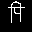

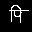

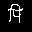

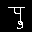

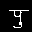

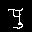

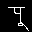

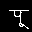

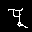

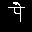

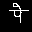

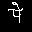

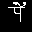

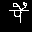

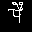

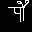

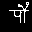

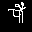

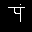

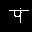

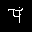

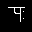

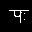

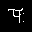

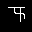

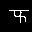

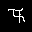

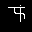

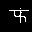

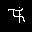

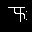

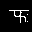

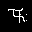

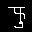

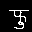

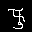

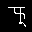

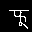

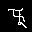

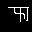

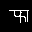

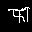

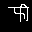

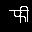

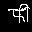

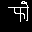

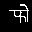

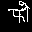

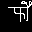

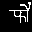

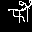

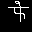

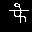

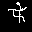

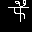

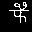

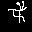

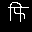

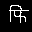

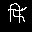

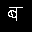

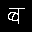

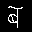

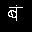

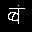

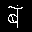

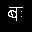

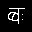

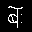

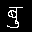

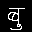

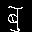

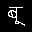

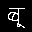

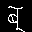

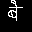

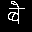

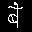

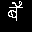

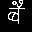

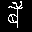

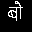

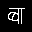

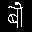

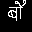

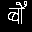

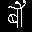

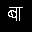

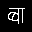

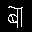

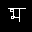

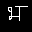

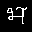

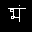

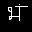

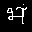

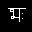

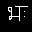

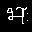

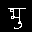

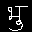

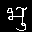

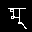

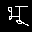

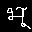

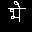

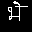

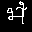

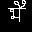

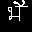

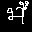

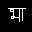

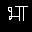

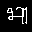

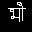

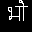

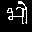

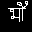

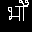

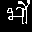

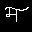

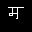

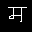

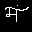

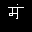

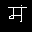

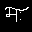

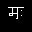

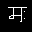

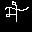

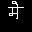

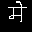

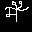

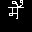

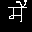

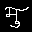

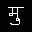

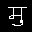

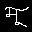

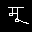

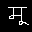

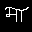

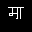

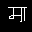

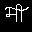

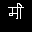

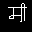

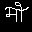

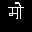

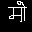

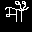

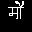

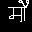

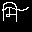

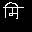

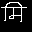

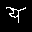

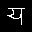

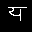

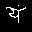

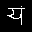

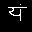

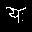

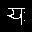

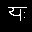

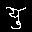

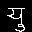

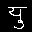

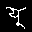

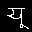

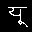

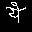

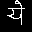

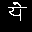

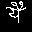

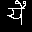

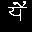

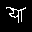

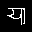

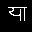

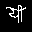

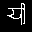

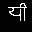

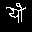

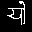

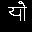

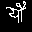

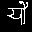

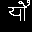

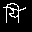

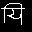

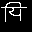

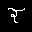

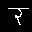

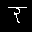

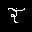

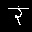

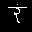

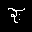

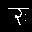

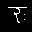

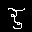

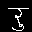

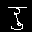

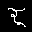

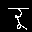

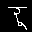

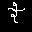

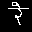

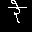

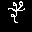

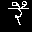

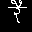

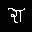

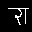

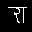

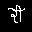

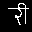

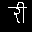

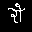

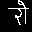

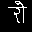

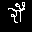

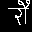

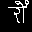

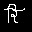

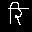

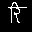

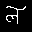

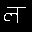

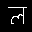

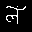

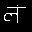

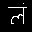

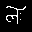

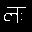

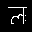

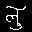

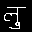

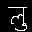

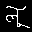

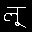

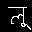

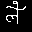

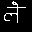

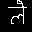

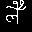

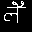

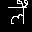

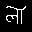

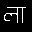

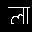

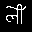

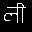

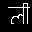

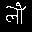

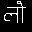

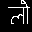

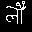

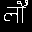

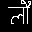

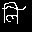

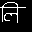

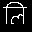

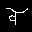

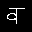

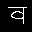

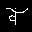

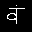

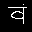

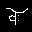

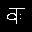

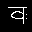

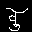

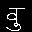

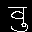

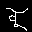

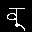

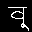

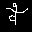

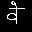

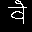

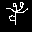

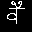

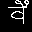

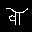

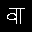

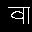

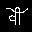

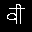

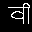

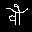

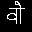

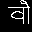

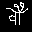

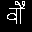

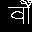

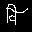

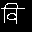

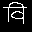

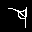

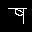

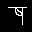

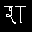

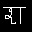

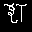

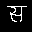

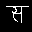

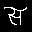

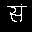

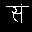

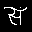

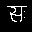

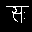

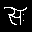

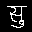

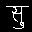

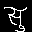

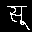

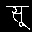

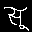

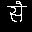

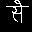

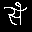

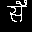

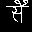

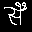

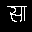

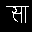

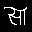

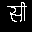

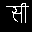

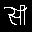

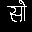

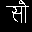

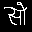

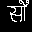

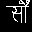

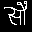

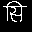

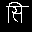

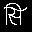

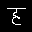

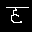

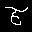

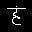

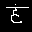

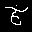

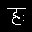

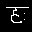

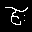

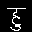

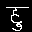

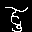

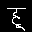

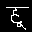

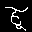

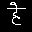

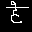

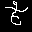

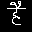

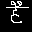

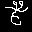

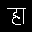

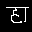

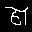

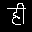

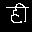

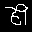

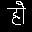

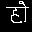

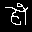

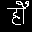

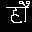

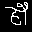

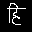

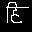

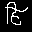

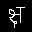

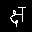

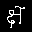

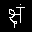

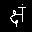

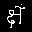

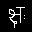

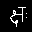

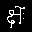

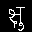

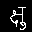

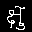

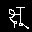

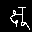

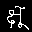

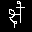

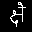

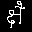

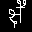

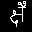

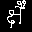

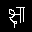

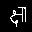

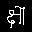

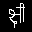

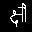

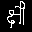

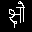

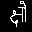

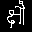

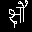

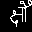

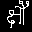

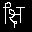

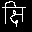

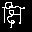

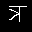

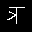

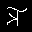

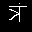

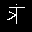

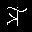

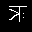

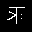

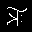

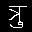

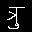

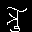

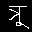

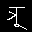

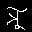

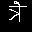

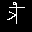

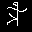

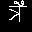

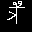

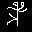

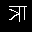

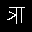

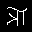

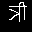

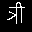

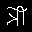

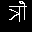

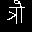

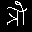

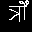

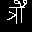

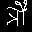

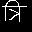

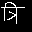

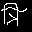

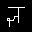

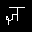

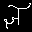

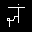

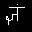

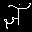

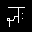

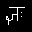

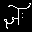

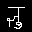

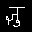

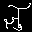

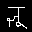

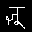

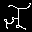

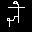

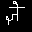

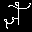

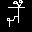

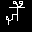

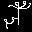

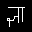

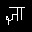

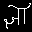

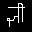

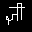

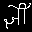

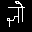

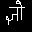

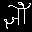

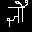

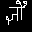

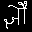

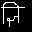

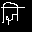

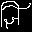

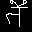

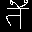

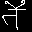

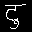

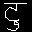

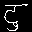

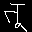

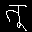

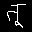

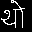

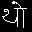

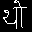

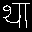

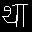

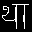

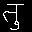

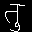

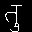

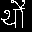

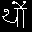

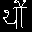

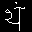

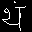

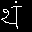

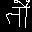

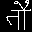

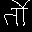

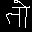

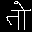

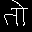

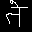

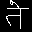

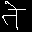

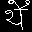

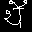

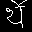

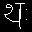

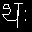

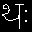

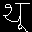

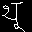

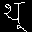

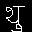

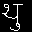

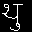

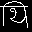

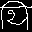

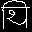

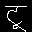

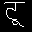

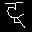

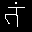

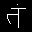

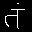

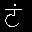

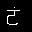

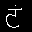

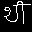

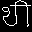

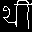

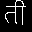

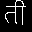

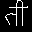

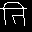

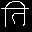

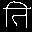

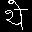

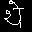

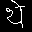

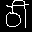

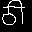

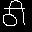

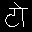

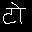

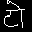

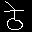

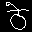

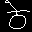

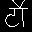

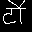

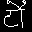

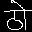

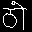

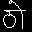

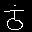

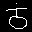

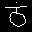

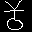

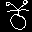

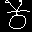

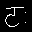

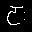

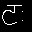

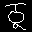

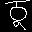

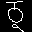

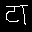

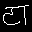

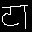

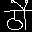

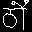

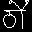

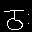

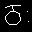

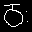

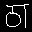

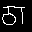

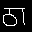

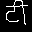

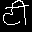

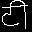

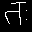

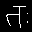

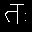

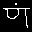

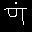

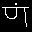

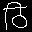

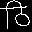

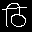

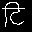

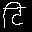

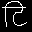

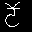

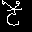

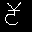

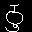

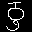

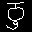

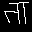

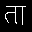

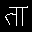

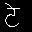

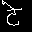

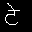

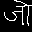

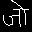

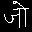

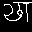

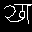

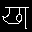

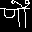

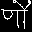

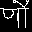

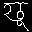

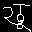

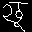

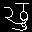

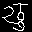

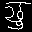

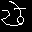

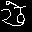

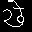

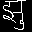

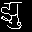

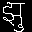

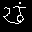

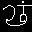

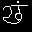

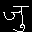

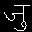

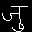

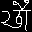

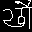

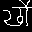

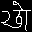

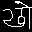

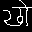

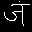

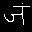

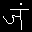

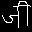

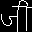

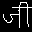

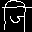

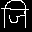

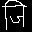

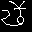

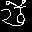

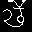

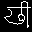

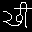

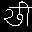

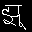

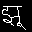

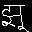

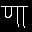

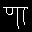

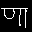

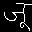

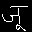

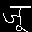

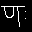

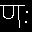

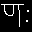

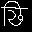

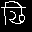

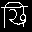

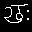

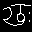

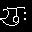

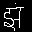

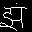

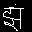

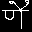

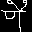

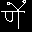

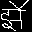

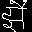

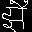

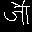

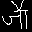

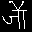

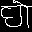

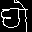

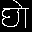

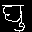

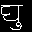

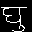

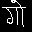

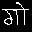

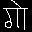

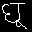

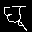

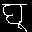

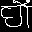

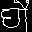

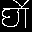

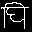

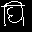

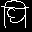

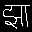

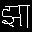

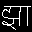

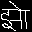

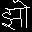

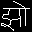

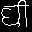

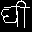

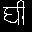

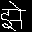

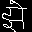

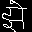

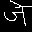

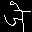

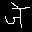

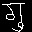

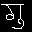

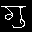

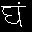

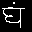

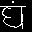

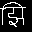

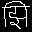

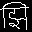

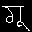

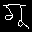

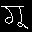

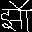

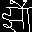

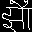

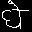

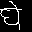

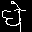

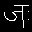

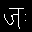

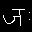

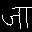

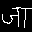

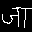

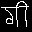

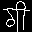

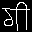

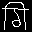

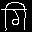

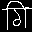

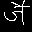

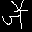

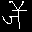

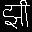

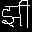

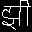

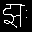

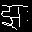

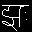

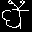

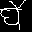

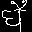

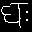

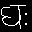

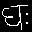

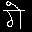

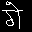

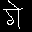

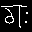

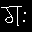

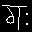

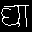

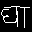

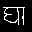

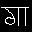

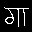

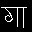

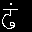

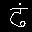

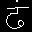

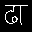

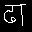

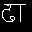

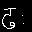

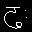

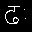

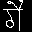

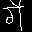

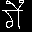

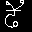

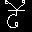

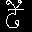

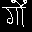

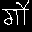

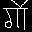

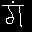

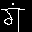

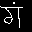

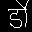

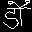

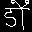

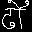

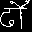

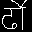

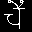

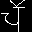

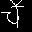

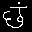

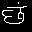

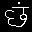

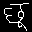

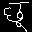

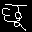

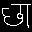

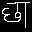

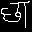

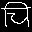

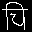

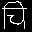

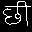

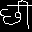

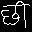

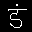

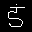

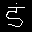

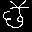

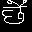

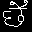

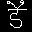

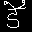

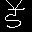

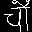

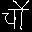

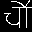

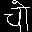

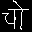

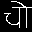

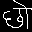

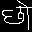

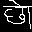

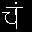

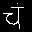

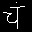

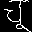

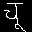

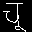

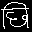

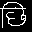

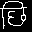

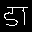

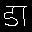

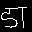

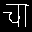

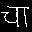

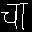

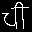

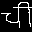

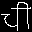

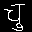

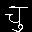

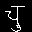

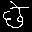

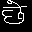

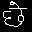

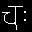

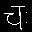

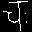

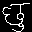

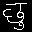

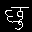

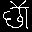

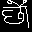

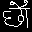

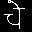

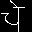

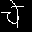

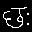

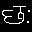

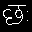

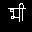

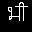

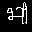

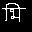

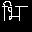

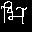

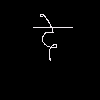

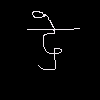

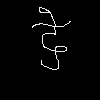

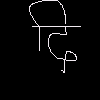

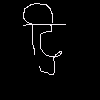

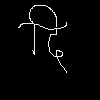

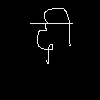

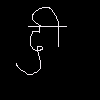

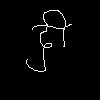

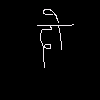

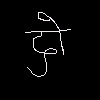

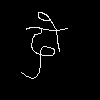

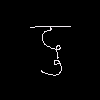

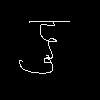

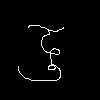

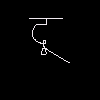

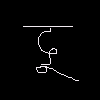

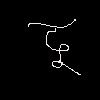

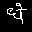

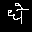

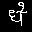

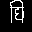

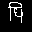

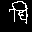

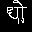

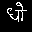

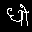

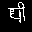

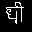

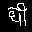

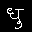

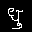

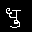

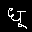

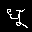

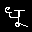

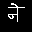

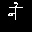

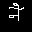

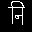

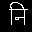

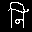

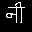

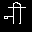

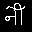

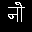

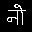

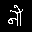

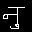

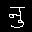

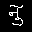

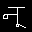

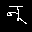

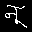

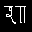

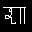

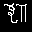

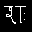

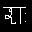

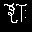

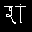

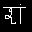

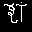

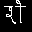

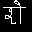

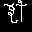

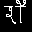

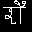

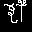

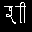

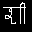

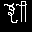

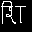

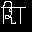

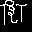

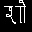

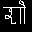

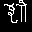

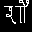

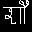

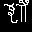

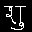

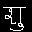

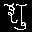

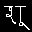

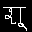

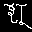

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import os

# Path to the folder containing files
folder_path = '/content/drive/MyDrive/ocr_unzip'

# Iterate through each file in the folder
for file_name in os.listdir(folder_path):
    # Check if the file is a directory
    if os.path.isdir(os.path.join(folder_path, file_name)):
        # Iterate through each image in the directory
        for image_name in os.listdir(os.path.join(folder_path, file_name)):
            # Check if the file is an image
            if image_name.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
                # Read the image
                image_path = os.path.join(folder_path, file_name, image_name)
                image = cv2.imread(image_path)

                # Display the image
                cv2_imshow(image)


In [ ]:
!which tesseract



/usr/bin/tesseract


In [ ]:
!apt install tesseract-ocr
!apt install libtesseract-dev
!pip install pytesseract


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 35 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (5,095 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 121749 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [ ]:
import cv2
import pytesseract
import os

# Path to the folder containing files
folder_path = '/content/drive/MyDrive/ocr_unzip'

# Initialize pytesseract
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

# Iterate through each file in the folder
for file_name in os.listdir(folder_path):
    # Check if the file is a directory
    if os.path.isdir(os.path.join(folder_path, file_name)):
        # Iterate through each image in the directory
        for image_name in os.listdir(os.path.join(folder_path, file_name)):
            # Check if the file is an image
            if image_name.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
                # Read the image
                image_path = os.path.join(folder_path, file_name, image_name)
                image = cv2.imread(image_path)

                # Convert the image to grayscale
                gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

                # Perform OCR using pytesseract
                text = pytesseract.image_to_string(gray_image, lang='eng')

                # Rename the file with the extracted text
                new_file_name = os.path.join(folder_path, file_name, f'{text.strip()}.jpg')
                os.rename(image_path, new_file_name)


In [ ]:
import cv2
from PIL import Image
import pytesseract
import os

# Set the TESSDATA_PREFIX environment variable
os.environ['TESSDATA_PREFIX'] = '/usr/share/tesseract-ocr/4.00/tessdata'

# Path to the folder containing files
folder_path = '/content/drive/MyDrive/ocr_unzip'

# List to store the extracted text from each image
labels = []

# Iterate through each file in the folder
for file_name in os.listdir(folder_path):
    # Check if the file is a directory
    if os.path.isdir(os.path.join(folder_path, file_name)):
        # Iterate through each image in the directory
        for image_name in os.listdir(os.path.join(folder_path, file_name)):
            # Check if the file is an image
            if image_name.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
                # Read the image
                image_path = os.path.join(folder_path, file_name, image_name)
                image = cv2.imread(image_path)

                # Convert the image to RGB (OpenCV uses BGR by default)
                image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                # Convert the NumPy array to a PIL Image object
                pil_image = Image.fromarray(image_rgb)

                # Perform OCR using Tesseract
                text = pytesseract.image_to_string(pil_image, lang='dev')  # Use the appropriate language code for Devanagari

                # Append the extracted text to the labels list
                labels.append(text)

# Show the extracted text
print(labels)


TesseractError: (1, 'Error opening data file /usr/share/tesseract-ocr/4.00/tessdata/dev.traineddata Please make sure the TESSDATA_PREFIX environment variable is set to your "tessdata" directory. Failed loading language \'dev\' Tesseract couldn\'t load any languages! Could not initialize tesseract.')

In [ ]:
# prompt: okay so make me a cnn that will scan the images and extract the text from those images , and make a list name labells where you will append those text results and show me the output of that list, remember that the location of the images is in the files where there are many files stored in the directory

import os
import cv2
import pytesseract
from langdetect import detect_langs
from google.colab import drive
from zipfile import ZipFile
import zipfile
from google.colab import files
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

from PIL import Image
from google.colab.patches import cv2_imshow

# Path to the folder containing images
input_dir = "/content/drive/MyDrive/ocr_unzip"

# Path to the output directory
output_dir = "/content/drive/MyDrive/ocr_labelled"

# Function to detect Devanagari script
def is_devanagari(text):
    try:
        lang = detect_langs(text)[0]
        return lang.lang == 'hi' and lang.prob > 0.8
    except:
        return False

# Iterate over files in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        file_path = os.path.join(input_dir, filename)
        # Read the image
        image = cv2.imread(file_path)
        # Convert the image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Use pytesseract to extract text from the image
        text = pytesseract.image_to_string(gray_image, lang='hin+eng')
        # Check if the extracted text is in Devanagari script
        if is_devanagari(text):
            # Rename the file to include the Devanagari label
            new_filename = "devanagari_" + filename
            new_file_path = os.path.join(output_dir, new_filename)
            os.rename(file_path, new_file_path)

drive.mount('/content/drive')


# Path to the zip file
zip_file_path = "/content/sample.zip"

# Directory to extract the files
extract_dir = "/content/extracted"

# Create a directory to extract the files
os.makedirs(extract_dir, exist_ok=True)

# Unzip the file
with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List the extracted files
extracted_files = os.listdir(extract_dir)
print("Extracted files:")
for file in extracted_files:
    print(file)

!unzip "/content/drive/MyDrive/ocr_datasets"

# Path to the folder containing the zip files
folder_path = "/content/drive/MyDrive/ocr_datasets"

# Get a list of all files in the folder
files = os.listdir(folder_path)

# Iterate through each file
for file in files:
    if file.endswith('.zip'):  # Check if the file is a zip file
        # Path to the zip file
        zip_file_path = os.path.join(folder_path, file)

        # Directory to extract the files to
        extract_dir = os.path.splitext(zip_file_path)[0]

        # Create a ZipFile object
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            # Extract all files to the directory
            zip_ref.extractall(extract_dir)


# Upload the zip file
uploaded = files.upload()

# Path to the folder where zip files are uploaded
folder_path = '/content/drive/MyDrive/ocr_datasets'

# Create the folder if it doesn't exist
os.makedirs(folder_path, exist_ok=True)

# Move the uploaded files to the folder
for name, data in uploaded.items():
    file_path = os.path.join(folder_path, name)
    with open(file_path, 'wb') as f:
        f.write(data)

# Iterate through each file in the folder
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    if file_name.endswith('.zip'):  # Check if the file is a zip file
        # Create a new folder for the extracted files
        extract_folder_name = os.path.splitext(file_name)[0]
        extract_folder_path = os.path.join(folder_path, extract_folder_name)
        os.makedirs(extract_folder_path, exist_ok=True)

        # Extract the zip file
        with zipfile.ZipFile(file_path, 'r') as zip_ref:
            zip_ref.extractall(extract_folder_path)

        # Remove the zip file
        os.remove(file_path)

# Refresh the file list in the sidebar
!echo '{"path": "/content"}' > /dev/null


# Path to the folder in Google Drive containing the zip files
folder_path = '/content/drive/MyDrive/ocr_datasets'

# Path to the folder where you want to extract the files
extracted_folder_path = '/content/drive/MyDrive/ocr_unzip'

# Create the extracted folder if it doesn't exist
os.makedirs(extracted_folder_path, exist_ok=True)

# List all files in the folder
files = os.listdir(folder_path)

# Iterate through each file
for file in files:
    if file.endswith('.zip'):  # Check if the file is a zip file
        # Path to the zip file
        zip_file_path = os.path.join(folder_path, file)

        # Directory to extract the files to
        extract_dir = os.path.join(extracted_folder_path, os.path.splitext(file)[0])

        # Create a directory for the extracted files
        os.makedirs(extract_dir, exist_ok=True)

        # Create a ZipFile object
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            # Extract all files to the directory
            zip_ref.extractall(extract_dir)

print("Extraction completed. Files are extracted to:", extracted_folder_path)


!pip install langdetect

# Load dataset
def load_dataset(data_directory):
    images = []
    labels = []
    for folder in os.listdir(data_directory):
        folder_path = os.path.join(data_directory, folder)
        if not os.path.isdir(folder_path):
            continue  # Skip if not a directory
        label = int(folder)  # Assuming folder name is the label
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            if not os.path.isfile(file_path):
                continue  # Skip if not a file
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (32, 32))
            images.append(image)
            labels.append(label)
    return np.array(images), np.array(labels)



# Load and preprocess dataset
data_directory = '/content/drive/MyDrive/ocr_unzip'
images, labels = load_dataset(data_directory)
images = images.reshape(-1, 32, 32, 1)
images = images / 255.0
labels = to_categorical(labels)

# Split dataset into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Define CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(46, activation='softmax')  # Adjust 46 based on the number of classes
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Data Augmentation
datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, zoom_range=0.2)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileNotFoundError: [Errno 2] No such file or directory: '/content/sample.zip'

In [ ]:
!pip install google-cloud-vision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.6/459.6 kB 5.1 MB/s eta 0:00:00


In [ ]:
# Install Tesseract OCR
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 38 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 3s (1,769 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [ ]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=2a8621825993e6edacafd2c2d427a456065954acdd97a56abeb31216a320e764
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
# prompt: make a cnn that will scan the image and extract the text from that image and store it in a list called as labells and show me that output

# Load dataset
def load_dataset(data_directory):
    images = []
    labels = []
    for folder in os.listdir(data_directory):
        folder_path = os.path.join(data_directory, folder)
        if not os.path.isdir(folder_path):
            continue  # Skip if not a directory
       # Fix the code by changing the label extraction line to:
        label = folder.split('_')[0]  # Assuming folder name is the label
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            if not os.path.isfile(file_path):
                continue  # Skip if not a file
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (32, 32))
            images.append(image)
            labels.append(label)
    return np.array(images), np.array(labels)



# Load and preprocess dataset
data_directory = '/content/drive/MyDrive/ocr_unzip'
images, labels = load_dataset(data_directory)
images = images.reshape(-1, 32, 32, 1)
images = images / 255.0
labels = to_categorical(labels)

# Split dataset into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Define CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(46, activation='softmax')  # Adjust 46 based on the number of classes
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Data Augmentation
datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, zoom_range=0.2)
datagen.fit(train_images)

# Train model
model.fit(datagen.flow(train_images, train_labels, batch_size=32), epochs=20, validation_data=(test_images, test_labels))

# Evaluate model
loss, accuracy = model.evaluate(test_images, test_labels)
print("Test Accuracy:", accuracy)

# Save retrained model
model.save('retrained_devanagari_character_recognition_model.h5')


def load_dataset(data_directory):
    images = []
    labels = []
    for folder in os.listdir(data_directory):
        folder_path = os.path.join(data_directory, folder)
        if not os.path.isdir(folder_path):
            continue  # Skip if not a directory
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            if not os.path.isfile(file_path):
                continue  # Skip if not a file
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (32, 32))
            images.append(image)
            # Use pytesseract to extract text from the image
            text = pytesseract.image_to_string(image, lang='eng+dev')
            labels.append(text.strip())
    return np.array(images), np.array(labels)

# Load dataset
data_directory = '/content/drive/MyDrive/ocr_unzip'
images, labels = load_dataset(data_directory)

# Print the file names and corresponding Devanagari letters
for file_name, devanagari_letter in zip(os.listdir(data_directory), labels):
    print(f"File: {file_name}, Devanagari Letter: {devanagari_letter}")


# Path to your directory containing the files
directory = '/content/drive/MyDrive/ocr_unzip'

# Initialize the Google Cloud Vision client
client = vision.ImageAnnotatorClient()

# Function to extract text from image
def extract_text(image_path):
    with open(image_path, 'rb') as image_file:
        content = image_file.read()
    image = vision.Image(content=content)
    response = client.text_detection(image=image)
    texts = response.text_annotations
    if texts:
        return texts[0].description
    return None

# Rename files based on the extracted text
for file_name in os.listdir(directory):
    image_path = os.path.join(directory, file_name)
    if os.path.isfile(image_path):
        text = extract_text(image_path)
        if text:
            new_file_name = text.replace(' ', '_')  # Replace spaces with underscores
            new_file_path = os.path.join(directory, new_file_name)
            os.rename(image_path, new_file_path)
            print(f"File '{file_name}' renamed to '{new_file_name}'")
        else:
            print(f"No text found in '{file_name}'")

!pip install google-cloud-vision


# Path to the folder containing images
data_directory = '/content/drive/MyDrive/ocr_unzip'

# Iterate over each file in the directory
for file_name in os.listdir(data_directory):
    # Read the image
    image_path = os.path.join(data_directory, file_name)
    image = cv2.imread(image_path)

    # Check if the image was read successfully
    if image is not None:
        # Convert the image to RGB (OpenCV uses BGR by default)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Convert the NumPy array to a PIL Image object
        pil_image = Image.fromarray(image_rgb)

        # Perform OCR using Tesseract
        try:
            text = pytesseract.image_to_string(pil_image, lang='dev')  # Use the appropriate language code for Devanagari
        except pytesseract.TesseractError as e:
            print(f"OCR failed for image '{image_path}': {e}")
            continue

        # Rename the file with the extracted text
        new_file_name = os.path.join(data_directory, f'{text.strip()}.jpg')
        os.rename(image_path, new_file_name)
    else:
        print(f"Failed to read image '{image_path}'")


# Path to the folder containing files
folder_path = '/content/drive/MyDrive/ocr_unzip'

# Initialize pytesseract
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

# Iterate through each file in the folder
for file_name in os.listdir(folder_path):
    # Check if the file is a directory
    if os.path.isdir(os.path.join(folder_path, file_name)):
        # Iterate through each image in the directory
        for image_name in os.listdir(os.path.join(folder_path, file_name)):
            # Check if the file is an image
            if image_name.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
                # Read the image
                image_path = os.path.join(folder_path, file_name, image_name)
                image = cv2.imread(image_path)

                # Convert the image to grayscale
                gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

                # Perform OCR using pytesseract
                text = pytesseract.image_to_string(gray_image, lang='eng')

                # Rename the file with the extracted text
                new_file_name = os.path.join(folder_path, file_name, f'{text.strip()}.jpg')
                os.rename(image_path, new_file_name)


# Set the TESSDATA_PREFIX environment variable
os.environ['TESSDATA_PREFIX'] = '/usr/share/tesseract-ocr/4.00/tessdata'

# Path to the folder containing files

ValueError: invalid literal for int() with base 10: 'd'

In [ ]:
import cv2
import numpy as np
import pytesseract
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
def load_dataset(data_directory):
    images = []
    labels = []
    for folder in os.listdir(data_directory):
        folder_path = os.path.join(data_directory, folder)
        if not os.path.isdir(folder_path):
            continue  # Skip if not a directory
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            if not os.path.isfile(file_path):
                continue  # Skip if not a file
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (32, 32))
            images.append(image)
            # Use pytesseract to extract text from the image
            text = pytesseract.image_to_string(image, lang='eng+dev')
            labels.append(text.strip())
    return np.array(images), np.array(labels)

# Load and preprocess dataset
data_directory = '/content/drive/MyDrive/ocr_unzip'
images, labels = load_dataset(data_directory)
images = images.reshape(-1, 32, 32, 1)
images = images / 255.0

# Convert labels to integers
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Split dataset into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Define CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(26, activation='softmax')  # Assuming 26 classes (letters A-Z)
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_acc)

# Predict on test images
predictions = model.predict(test_images)

# Decode predictions
decoded_predictions = label_encoder.inverse_transform(np.argmax(predictions, axis=1))

# Show predictions
print(decoded_predictions)
print(labels)


Epoch 1/10
10/10 [==============================] - 1s 24ms/step - loss: 1.1359 - accuracy: 0.8639 - val_loss: 0.1705 - val_accuracy: 0.9865
Epoch 2/10
10/10 [==============================] - 0s 8ms/step - loss: 0.5023 - accuracy: 0.9558 - val_loss: 0.1199 - val_accuracy: 0.9865
Epoch 3/10
10/10 [==============================] - 0s 8ms/step - loss: 0.2671 - accuracy: 0.9558 - val_loss: 0.1734 - val_accuracy: 0.9865
Epoch 4/10
10/10 [==============================] - 0s 8ms/step - loss: 0.2265 - accuracy: 0.9558 - val_loss: 0.0668 - val_accuracy: 0.9865
Epoch 5/10
10/10 [==============================] - 0s 8ms/step - loss: 0.1931 - accuracy: 0.9558 - val_loss: 0.0638 - val_accuracy: 0.9865
Epoch 6/10
10/10 [==============================] - 0s 7ms/step - loss: 0.1549 - accuracy: 0.9626 - val_loss: 0.0514 - val_accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 0s 7ms/step - loss: 0.1288 - accuracy: 0.9592 - val_loss: 0.0287 - val_accuracy: 1.0000
Epoch 8/10
10/10 [=

NameError: name 'labells' is not defined

In [ ]:
import cv2
import os
import pytesseract

# Path to the folder containing files
folder_path = '/content/drive/MyDrive/ocr_unzip'

# Initialize the list to store labels
labels = []

# Iterate through each file in the folder
for file_name in os.listdir(folder_path):
    # Check if the file is a directory
    if os.path.isdir(os.path.join(folder_path, file_name)):
        # Iterate through each image in the directory
        for image_name in os.listdir(os.path.join(folder_path, file_name)):
            # Check if the file is an image
            if image_name.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
                # Read the image
                image_path = os.path.join(folder_path, file_name, image_name)
                image = cv2.imread(image_path)

                # Extract text from the image using Tesseract OCR
                text = pytesseract.image_to_string(image, lang='hin')

                # Append the extracted text to the labels list
                labels.append(text.strip())

# Show the list of labels
print(labels)


['', '', '', 'न', 'के', 'थी', '', '', 'दि.', '', 'दो हर', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'पैन', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '0', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '2', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '

In [ ]:
# Define the Hindi barakhadi with matras
barakhadi = {
    'क': 'क, का, कि, की, कु, कू, के, कै, को, कौ, कं, कः',
    'ख': 'ख, खा, खि, खी, खु, खू, खे, खै, खो, खौ, खं, खः',
    'ग': 'ग, गा, गि, गी, गु, गू, गे, गै, गो, गौ, गं, गः',
    'घ': 'घ, घा, घि, घी, घु, घू, घे, घै, घो, घौ, घं, घः',
    'ङ': 'ङ, ङा, ङि, ङी, ङु, ङू, ङे, ङै, ङो, ङौ, ङं, ङः',
    'च': 'च, चा, चि, ची, चु, चू, चे, चै, चो, चौ, चं, चः',
    'छ': 'छ, छा, छि, छी, छु, छू, छे, छै, छो, छौ, छं, छः',
    'ज': 'ज, जा, जि, जी, जु, जू, जे, जै, जो, जौ, जं, जः',
    'झ': 'झ, झा, झि, झी, झु, झू, झे, झै, झो, झौ, झं, झः',
    'ञ': 'ञ, ञा, ञि, ञी, ञु, ञू, ञे, ञै, ञो, ञौ, ञं, ञः',
    'ट': 'ट, टा, टि, टी, टु, टू, टे, टै, टो, टौ, टं, टः',
    'ठ': 'ठ, ठा, ठि, ठी, ठु, ठू, ठे, ठै, ठो, ठौ, ठं, ठः',
    'ड': 'ड, डा, डि, डी, डु, डू, डे, डै, डो, डौ, डं, डः',
    'ढ': 'ढ, ढा, ढि, ढी, ढु, ढू, ढे, ढै, ढो, ढौ, ढं, ढः',
    'ण': 'ण, णा, णि, णी, णु, णू, णे, णै, णो, णौ, णं, णः',
    'त': 'त, ता, ति, ती, तु, तू, ते, तै, तो, तौ, तं, तः',
    'थ': 'थ, था, थि, थी, थु, थू, थे, थै, थो, थौ, थं, थः',
    'द': 'द, दा, दि, दी, दु, दू, दे, दै, दो, दौ, दं, दः',
    'ध': 'ध, धा, धि, धी, धु, धू, धे, धै, धो, धौ, धं, धः',
    'न': 'न, ना, नि, नी, नु, नू, ने, नै, नो, नौ, नं, नः',
    'प': 'प, पा, पि, पी, पु, पू, पे, पै, पो, पौ, पं, पः',
    'फ': 'फ, फा, फि, फी, फु, फू, फे, फै, फो, फौ, फं, फः',
    'ब': 'ब, बा, बि, बी, बु, बू, बे, बै, बो, बौ, बं, बः',
    'भ': 'भ, भा, भि, भी, भु, भू, भे, भै, भो, भौ, भं, भः',
    'म': 'म, मा, मि, मी, मु, मू, मे, मै, मो, मौ, मं, मः',
    'य': 'य, या, यि, यी, यु, यू, ये, यै, यो, यौ, यं, यः',
    'र': 'र, रा, रि, री, रु, रू, रे, रै, रो, रौ, रं, रः',
    'ल': 'ल, ला, लि, ली, लु, लू, ले, लै, लो, लौ, लं, लः',
    'व': 'व, वा, वि, वी, वु, वू, वे, वै, वो, वौ, वं, वः',
    'श': 'श, शा, शि, शी, शु, शू, शे, शै, शो, शौ, शं, शः',
    'ष': 'ष, षा, षि, षी, षु, षू, षे, षै, षो, षौ, षं, षः',
    'स': 'स, सा, सि, सी, सु, सू, से, सै, सो, सौ, सं, सः',
    'ह': 'ह, हा, हि, ही, हु, हू, हे, है, हो, हौ, हं, हः',
    'क्ष': 'क्ष, क्षा, क्षि, क्षी, क्षु, क्षू, क्षे, क्षै, क्षो, क्षौ, क्षं, क्षः',
    'त्र': 'त्र, त्रा, त्रि, त्री, त्रु, त्रू, त्रे, त्रै, त्रो, त्रौ, त्रं, त्रः',
    'ज्ञ': 'ज्ञ, ज्ञा, ज्ञि, ज्ञी, ज्ञु, ज्ञू, ज्ञे, ज्ञै, ज्ञो, ज्ञौ, ज्ञं, ज्ञः'
}

# Store the Hindi barakhadi with matras in a list
labels = [matras for matras in barakhadi.values()]

# Print the list
print(labels)


['क, का, कि, की, कु, कू, के, कै, को, कौ, कं, कः', 'ख, खा, खि, खी, खु, खू, खे, खै, खो, खौ, खं, खः', 'ग, गा, गि, गी, गु, गू, गे, गै, गो, गौ, गं, गः', 'घ, घा, घि, घी, घु, घू, घे, घै, घो, घौ, घं, घः', 'ङ, ङा, ङि, ङी, ङु, ङू, ङे, ङै, ङो, ङौ, ङं, ङः', 'च, चा, चि, ची, चु, चू, चे, चै, चो, चौ, चं, चः', 'छ, छा, छि, छी, छु, छू, छे, छै, छो, छौ, छं, छः', 'ज, जा, जि, जी, जु, जू, जे, जै, जो, जौ, जं, जः', 'झ, झा, झि, झी, झु, झू, झे, झै, झो, झौ, झं, झः', 'ञ, ञा, ञि, ञी, ञु, ञू, ञे, ञै, ञो, ञौ, ञं, ञः', 'ट, टा, टि, टी, टु, टू, टे, टै, टो, टौ, टं, टः', 'ठ, ठा, ठि, ठी, ठु, ठू, ठे, ठै, ठो, ठौ, ठं, ठः', 'ड, डा, डि, डी, डु, डू, डे, डै, डो, डौ, डं, डः', 'ढ, ढा, ढि, ढी, ढु, ढू, ढे, ढै, ढो, ढौ, ढं, ढः', 'ण, णा, णि, णी, णु, णू, णे, णै, णो, णौ, णं, णः', 'त, ता, ति, ती, तु, तू, ते, तै, तो, तौ, तं, तः', 'थ, था, थि, थी, थु, थू, थे, थै, थो, थौ, थं, थः', 'द, दा, दि, दी, दु, दू, दे, दै, दो, दौ, दं, दः', 'ध, धा, धि, धी, धु, धू, धे, धै, धो, धौ, धं, धः', 'न, ना, नि, नी, नु, नू, ने, नै, नो, नौ, नं, नः', 'प, पा, पि, पी, पु,

In [ ]:
import cv2
import os

# Path to the folder containing files
folder_path = '/content/drive/MyDrive/ocr_unzip'

# Iterate through each file in the folder
for file_name in os.listdir(folder_path):
    # Check if the file is a directory
    if os.path.isdir(os.path.join(folder_path, file_name)):
        # Iterate through each image in the directory
        for image_name in os.listdir(os.path.join(folder_path, file_name)):
            # Check if the file is an image
            if image_name.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
                # Read the image
                image_path = os.path.join(folder_path, file_name, image_name)
                image = cv2.imread(image_path)

                # Extract text from the image using Tesseract OCR
                text = "text from OCR"  # Replace this with your actual OCR code

                # Store the mapping of file name to label
                label_mapping = {
                    'क, का, कि, की, कु, कू, के, कै, को, कौ, कं, कः': 'label1',
                    'ख, खा, खि, खी, खु, खू, खे, खै, खो, खौ, खं, खः': 'label2',

                }

                # Rename the file with the corresponding label
                new_file_name = os.path.join(folder_path, file_name, f'{label_mapping.get(text, "unknown")}.jpg')
                os.rename(image_path, new_file_name)


KeyboardInterrupt: 

In [ ]:
!mv '/content/drive/MyDrive/hin.traineddata' '/usr/share/tesseract-ocr/4.00/tessdata/'


In [ ]:
import cv2
import os
import pytesseract

# Path to the folder containing files
folder_path = '/content/drive/MyDrive/ocr_unzip'

# List of labels
labels = [
    'क, का, कि, की, कु, कू, के, कै, को, कौ, कं, कः',
    'ख, खा, खि, खी, खु, खू, खे, खै, खो, खौ, खं, खः',
    'ग, गा, गि, गी, गु, गू, गे, गै, गो, गौ, गं, गः',
    'घ, घा, घि, घी, घु, घू, घे, घै, घो, घौ, घं, घः',
    'ङ, ङा, ङि, ङी, ङु, ङू, ङे, ङै, ङो, ङौ, ङं, ङः',
    'च, चा, चि, ची, चु, चू, चे, चै, चो, चौ, चं, चः',
    'छ, छा, छि, छी, छु, छू, छे, छै, छो, छौ, छं, छः',
    'ज, जा, जि, जी, जु, जू, जे, जै, जो, जौ, जं, जः',
    'झ, झा, झि, झी, झु, झू, झे, झै, झो, झौ, झं, झः',
    'ञ, ञा, ञि, ञी, ञु, ञू, ञे, ञै, ञो, ञौ, ञं, ञः',
    'ट, टा, टि, टी, टु, टू, टे, टै, टो, टौ, टं, टः',
    'ठ, ठा, ठि, ठी, ठु, ठू, ठे, ठै, ठो, ठौ, ठं, ठः',
    'ड, डा, डि, डी, डु, डू, डे, डै, डो, डौ, डं, डः',
    'ढ, ढा, ढि, ढी, ढु, ढू, ढे, ढै, ढो, ढौ, ढं, ढः',
    'ण, णा, णि, णी, णु, णू, णे, णै, णो, णौ, णं, णः',
    'त, ता, ति, ती, तु, तू, ते, तै, तो, तौ, तं, तः',
    'थ, था, थि, थी, थु, थू, थे, थै, थो, थौ, थं, थः',
    'द, दा, दि, दी, दु, दू, दे, दै, दो, दौ, दं, दः',
    'ध, धा, धि, धी, धु, धू, धे, धै, धो, धौ, धं, धः',
    'न, ना, नि, नी, नु, नू, ने, नै, नो, नौ, नं, नः',
    'प, पा, पि, पी, पु, पू, पे, पै, पो, पौ, पं, पः',
    'फ, फा, फि, फी, फु, फू, फे, फै, फो, फौ, फं, फः',
    'ब, बा, बि, बी, बु, बू, बे, बै, बो, बौ, बं, बः',
    'भ, भा, भि, भी, भु, भू, भे, भै, भो, भौ, भं, भः',
    'म, मा, मि, मी, मु, मू, मे, मै, मो, मौ, मं, मः',
    'य, या, यि, यी, यु, यू, ये, यै, यो, यौ, यं, यः',
    'र, रा, रि, री, रु, रू, रे, रै, रो, रौ, रं, रः',
    'ल, ला, लि, ली, लु, लू, ले, लै, लो, लौ, लं, लः',
    'व, वा, वि, वी, वु, वू, वे, वै, वो, वौ, वं, वः',
    'श, शा, शि, शी, शु, शू, शे, शै, शो, शौ, शं, शः',
    'ष, षा, षि, षी, षु, षू, षे, षै, षो, षौ, षं, षः',
    'स, सा, सि, सी, सु, सू, से, सै, सो, सौ, सं, सः',
    'ह, हा, हि, ही, हु, हू, हे, है, हो, हौ, हं, हः',
    'क्ष, क्षा, क्षि, क्षी, क्षु, क्षू, क्षे, क्षै, क्षो, क्षौ, क्षं, क्षः',
    'त्र, त्रा, त्रि, त्री, त्रु, त्रू, त्रे, त्रै, त्रो, त्रौ, त्रं, त्रः',
    'ज्ञ, ज्ञा, ज्ञि, ज्ञी, ज्ञु, ज्ञू, ज्ञे, ज्ञै, ज्ञो, ज्ञौ, ज्ञं, ज्ञः'

]

# Create a mapping of labels to file names
label_mapping = {}
for label in labels:
    for item in label.split(', '):
        label_mapping[item] = label

# Iterate through each file in the folder
for file_name in os.listdir(folder_path):
    # Check if the file is a directory
    if os.path.isdir(os.path.join(folder_path, file_name)):
        # Iterate through each image in the directory
        for image_name in os.listdir(os.path.join(folder_path, file_name)):
            # Check if the file is an image
            if image_name.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
                # Read the image
                image_path = os.path.join(folder_path, file_name, image_name)
                image = cv2.imread(image_path)

                # Extract text from the image using pytesseract
                text = pytesseract.image_to_string(image, lang='hin')

                # Get the corresponding label from the mapping
                label = label_mapping.get(text.strip(), 'unknown')

                # Rename the file with the corresponding label
                new_file_name = os.path.join(folder_path, file_name, f'{label}.jpg')
                os.rename(image_path, new_file_name)
